In [169]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
# reading all words
words = open('names.txt', 'r').read().splitlines()

In [171]:
len(words)

32033

In [294]:
chars = sorted(list(set(''.join(words))))
stoi = {ch:i+1 for i,ch in enumerate(chars)}
stoi['.'] = 0
itos = {i:ch for ch, i in stoi.items()}

total_chars = len(stoi)

In [346]:
#Creating the Training Set of Bigrams
block_size = 3 #context length: how many characters do we take to predict next one.
def create_dataset(dataset, block_size):
    X, Y = [], []
    for word in dataset:
        context = [0] * block_size
        for ch in word + '.':
            ix = stoi[ch]
            X.append(context[:])
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n = len(words)
n1, n2 = int(n*0.8), int(n*0.9)
Xtr, Ytr = create_dataset(words[:n1], block_size)
Xdev, Ydev = create_dataset(words[n1:n2], block_size)
Xtst, Ytst = create_dataset(words[n2:], block_size)

In [368]:
dim_e = 10
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((total_chars, dim_e)) #dimensions (27x2)
W1 = torch.randn((block_size * dim_e, 200))
b1 = torch.randn(200)
W2 = torch.randn((200, total_chars))
b2 = torch.randn(total_chars)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [377]:
C[Xtr].shape

torch.Size([182424, 3, 10])

In [378]:
def forward_pass(X):
    emb = C[X]
    h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1)
    logits = h @ W2 + b2
    return logits

In [379]:
sum(p.nelement() for p in parameters)

11897

In [370]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [371]:
lossi = []
lri = []
stepi = []

In [372]:
epoch = 200000
lr = 0.01#10**-1
mini_batch = 32

for i in range(epoch):
    
    #miniBatch
    ix = torch.randint(0, Xtr.shape[0], (mini_batch,))
    
    #Forward Pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1) 
    logits = h @ W2 + b2
    #logits = forward_pass(Xtr[ix])
    loss = F.cross_entropy(logits, Ytr[ix])
    #print("loss for epoch " + str(i + 1) + ": " + str(loss.item()))
    
    #Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
#     lr = lrs[i]
    #Update parameters:
    lr = 0.1 if i<100_000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
        
    #tracking stats
    lossi.append(loss.log10().item())
    stepi.append(i)
#     lri.append(lre[i])

# plt.plot(lri, lossi)  

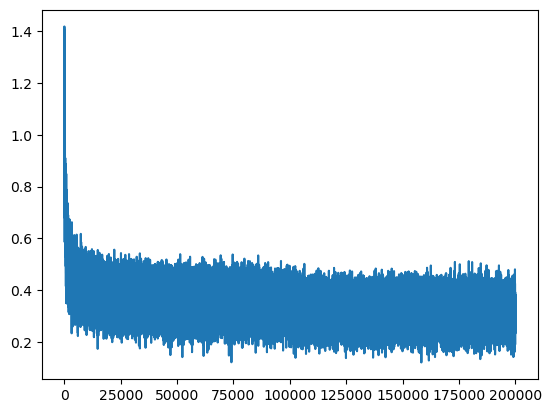

In [373]:
plt.plot(lossi)

In [381]:
# emb = C[Xtr]
# h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1) 
# logits = h @ W2 + b2
logits = forward_pass(Xtr)
loss = F.cross_entropy(logits, Ytr)
print(f'Full loss : {loss: .4f}')

Full loss :  2.1192


In [382]:
# emb = C[Xdev]
# h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1) 
# logits = h @ W2 + b2
logits = forward_pass(Xdev)
loss = F.cross_entropy(logits, Ydev)
print(f'Full loss : {loss: .4f}')

Full loss :  2.1691


In [383]:
# emb = C[Xtst]
# h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1) 
# logits = h @ W2 + b2
logits = forward_pass(Xtst)
loss = F.cross_entropy(logits, Ytst)
print(f'Full loss : {loss: .4f}')

Full loss :  2.1793


In [355]:
#Visualize the 2d embeddings
if(C.shape[1]==2):
    plt.figure(figsize=(8,8))
    plt.scatter(C[:,0].data, C[:,1].data, s=200)
    for i in range(C.shape[0]):
        plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
    plt.grid('minor')

# Sampling

In [385]:
g = torch.Generator().manual_seed(2147483647 + 10)

In [396]:
output = 30
#sample from the model
for i in range(output):
    
    out = []
    context = [0] * block_size
    while True:
        logits = forward_pass(torch.tensor([context]))
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1,generator=g).item()
        context = context[1:] + [ix]
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

issa.
dham.
zahmaria.
latz.
rydin.
briyan.
sralin.
ellynn.
zarye.
abdieh.
emyka.
seyliana.
brysantonleistyn.
dhriyuah.
pran.
chito.
aptexxon.
tamarcy.
bri.
jasmarih.
ror.
anna.
kereed.
freemya.
dale.
safaten.
deeverley.
anv.
ana.
jafarti.
